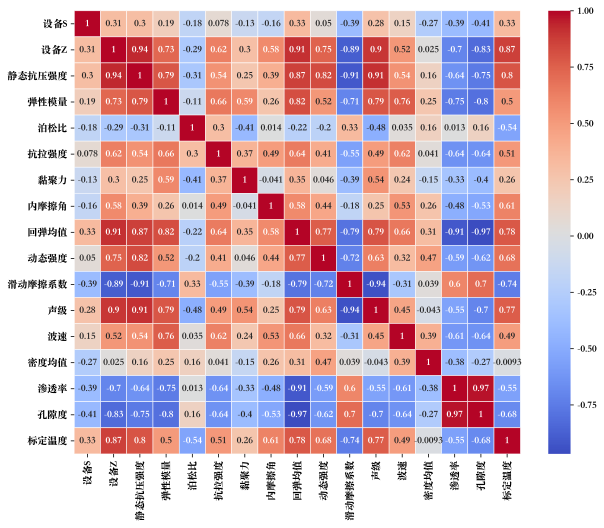

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
rock_character = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '材料')
device_wob = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备wob')
device_T = pd.read_excel('../data/模型数据副本.xlsx',sheet_name = '设备T')
#去除序号和岩性名称两列; 分析岩石属性和设备S、设备Z之间的相关性
rock_character = rock_character.drop(['序号', '岩性名称'], axis=1)
rock_character = rock_character.drop(['粒径', '拉强比', '脆性指数'], axis=1)

corr_matrix = rock_character.corr()
# 设置图像大小
plt.figure(figsize=(10, 8))
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False

# 使用Seaborn绘制热力图
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={'size': 10})  # annot=True会显示数字在单元格内

plt.savefig('热力图20240417.svg',format='svg')
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

joint_columns = ['设备S', '设备Z', '静态抗压强度', '弹性模量', '泊松比', '抗拉强度', '黏聚力', '内摩擦角', '回弹均值',
       '动态强度', '滑动摩擦系数', '声级', '波速', '密度均值', '渗透率', '孔隙度', '标定温度']
# 计算相关系数矩阵
correlation_matrix = rock_character[joint_columns].corr()
#布局更紧凑一点，中间加入网格线
g = sns.PairGrid(rock_character[joint_columns],layout_pad=0)
g.map_lower(sns.regplot)  # 下三角
g.map_diag(sns.histplot) # 对角线

for i in range(len(joint_columns)):
    for j in range(i + 1, len(joint_columns)):
        r = correlation_matrix.iloc[i, j]
        col_x, col_y = joint_columns[i], joint_columns[j]
        
        # 获取当前子图的ax对象
        ax = g.axes[i][j]
                #删除原子图
        #ax.clear()
        # 
        ax.text(0.7, 0.5, f'  R = {r:.2f}', ha='right', va='top', transform=ax.transAxes, fontsize=24)

plt.show()

In [4]:
device_wob['time'] = [int(temp) for temp in device_wob['时间/s']]
device_T['time'] = [int(temp) for temp in device_T['时间/s']]
device_wob.head(n=10)

,时间/s,材料2,材料4,材料5,材料7,材料8,材料10,材料11,材料13,材料55,材料21,材料22,time
0,1050.079,3.52979,3.86777,4.21938,3.59135,3.96912,3.85427,4.25898,3.40934,3.47527,3.47438,3.57316,1050
1,1050.408,3.57550,4.15474,4.22286,4.16016,3.80430,4.22770,4.28917,3.36766,3.46216,3.71893,3.09925,1050
2,1050.736,3.02758,3.97370,4.29815,4.43740,3.87965,4.39262,4.23249,3.51096,3.45398,3.36218,3.85679,1050
3,1050.958,3.65089,3.84635,4.08101,3.26430,3.89811,3.92192,4.92878,3.39680,3.43509,3.52313,3.55268,1050
4,1051.288,3.30212,4.09004,4.23566,4.10532,3.80647,3.42948,4.63190,3.38498,3.56799,3.67709,4.00877,1051
5,1051.618,3.63342,3.86366,4.12280,3.79748,3.89958,4.36011,4.16036,3.45208,3.43067,3.59268,3.70822,1051
6,1051.946,3.38165,4.00035,4.11504,5.01131,3.80127,3.81102,3.86702,3.41159,3.56794,3.61224,3.68734,1051
7,1052.274,3.46744,3.80704,4.29575,3.46250,3.94969,3.94280,4.66765,3.39412,3.48195,3.35209,3.62289,1052
8,1052.603,3.56689,4.13628,4.23032,4.31827,3.75266,4.34272,4.65798,3.32595,3.44208,3.71092,3.16558,1052
9,1052.932,3.00286,4.02726,4.31455,4.43977,3.81083,3.93152,4.45048,3.48155,3.44631,3.14058,4.00427,1052


In [ ]:
#每秒的数据取平均值
device_wob_mean = device_wob.groupby('time').mean().reset_index()
del device_wob_mean['时间/s']
device_wob_mean
device_wob_mean = device_wob_mean.set_index('time')
# 绘制所有列（除了已经设置为索引的'time'列）
device_wob_mean.plot(figsize=(10, 6))  # figsize参数用于设置图表大小

plt.title('不同材料随时间的变化')  # 添加标题
plt.xlabel('时间')  # 添加X轴标签，
plt.ylabel('数值')  # 添加Y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.xticks(rotation=45)  # 旋转X轴的标签，以免重叠，根据需要调整
plt.show()

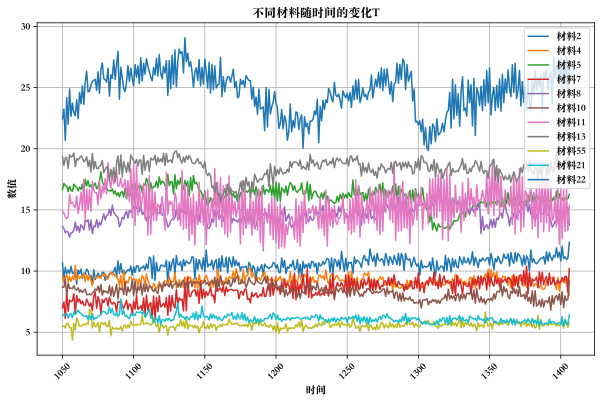

In [7]:
#每秒的数据取平均值
device_T_mean = device_T.groupby('time').mean().reset_index()
del device_T_mean['时间/s']
device_T_mean
device_T_mean = device_T_mean.set_index('time')
# 绘制所有列（除了已经设置为索引的'time'列）
device_T_mean.plot(figsize=(10, 6))  # figsize参数用于设置图表大小

plt.title('不同材料随时间的变化T')  # 添加标题
plt.xlabel('时间')  
plt.ylabel('数值')  # 添加Y轴标签
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格

plt.xticks(rotation=45)  # 旋转X轴的标签，以免重叠，根据需要调整
plt.show()